<a href="https://colab.research.google.com/github/Haejungg97/woorifisa_final_ai/blob/main/%F0%9F%94%A80911_HJ_%EC%8B%9C%EA%B3%84%EC%97%B4%26XGBOOST%EB%A1%9C_%EC%98%88%EC%B8%A1%F0%9F%91%B7%E2%80%8D%E2%99%80%EF%B8%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/[최종프로젝트]_우리FISA/0911/시계열모델링(0911).csv',encoding='UTF8')
df_service =pd.read_csv('/content/drive/MyDrive/[최종프로젝트]_우리FISA/0911/업종_분류.csv',encoding='euc-kr')

'기간'컬럼이 object형이라 다시 datetime형으로 바꿔줌

In [ ]:
df['기간'] = pd.to_datetime(df['기간'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398175 entries, 0 to 398174
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   행정동_코드     398175 non-null  int64         
 1   업종_대분류_코드  398175 non-null  int64         
 2   서비스_업종_코드  398175 non-null  int64         
 3   분기당_매출_금액  398175 non-null  int64         
 4   기간         398175 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4)
memory usage: 15.2 MB


In [ ]:
df.head(10)

In [ ]:
unique_code_count = df['행정동_코드'].nunique()

print("행정동_코드의 고유한 개수:", unique_code_count)

행정동_코드의 고유한 개수: 393


In [ ]:
unique_code_count = df['서비스_업종_코드'].nunique()

print("서비스_업종_코드의 고유한 개수:", unique_code_count)

서비스_업종_코드의 고유한 개수: 81


### 묶기
 '행정동_코드' -> '업종_대분류_코드' -> '서비스_업종_코드' 순서로 그룹화

df_행정동코드_업종코드

df_123453

df_123445_3

df_123454_3



# 1) 데이터프레임 묶기

In [ ]:
import pandas as pd


# '행정동_코드'로 그룹화하여 분리하고 각각의 데이터프레임으로 저장
grouped = df.groupby('행정동_코드')
separated_dfs = [group for _, group in grouped]

for a in range(len(separated_dfs)):
    first_code = separated_dfs[a]['행정동_코드'].iloc[0]

    grouped_2 = separated_dfs[a].groupby('업종_대분류_코드')
    separated_dfs_2 = [group for _, group in grouped_2]

    for c in range(len(separated_dfs_2)):
      first_code_2 = separated_dfs_2[c]['업종_대분류_코드'].iloc[0]


      # 데이터프레임 이름 만들기
      df_name = f"df_{first_code}_{first_code_2}"

      # 데이터프레임 저장
      globals()[df_name] = separated_dfs_2[c]

## 접기

In [ ]:
# import pandas as pd


# # '행정동_코드'로 그룹화하여 분리하고 각각의 데이터프레임으로 저장
# grouped = df.groupby('행정동_코드')
# separated_dfs = [group for _, group in grouped]

# for a in range(len(separated_dfs)):
#     first_code = separated_dfs[a]['행정동_코드'].iloc[0]
#       # globals()[f"df_{first_code}"] = separated_dfs[a]

#     grouped_2 = separated_dfs[a].groupby('업종_대분류_코드')
#     separated_dfs_2 = [group for _, group in grouped_2]

#     for c in range(len(separated_dfs_2)):
#       first_code_2 = separated_dfs_2[c]['업종_대분류_코드'].iloc[0]
#         # globals()[f"df_{first_code_2}"] = separated_dfs_2[c]

#         # for j in range(len(separated_dfs_2[c])):
#         #   grouped_3 = separated_dfs_2[c].groupby('서비스_업종_코드')
#         #   separated_dfs_3 = [group for _, group in grouped_3]

#         #   for k in range(len(separated_dfs_3)):
#         #     first_code_3 = separated_dfs_3[k]['서비스_업종_코드'].iloc[0]


#       # 데이터프레임 이름 만들기
#       df_name = f"df_{first_code}_{first_code_2}"

#       # 데이터프레임 저장
#       globals()[df_name] = separated_dfs_2[c]

In [ ]:
separated_dfs_2[0]

# xgboost

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# 예시로 넣은..거...

df_11110515_1_100009 = df_11110515_1_100009[['분기당_매출_금액', '기간']]

df_11110515_1_100009['기간'] = df_11110515_1_100009['기간'].astype(int)

X = df_11110515_1_100009.drop(['분기당_매출_금액'], axis=1)
y = df_11110515_1_100009['분기당_매출_금액']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = xgb.XGBRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 3422675617666357.5
R-squared: 0.6110247417592183


# 시계열

In [ ]:
!pip install pystan
!pip install prophet

In [ ]:
!pip install git+https://github.com/facebook/prophet.git


## 서비스업종별 예측 매출 그래프가 각각 나와서 보기 힘들다.

In [ ]:
import pandas as pd
from prophet import Prophet
import numpy as np
import matplotlib.pyplot as plt

data = pd.DataFrame({'ds':separated_dfs_2[0]['기간'],
        'y':separated_dfs_2[0]['분기당_매출_금액']})

# Prophet 모델
model = Prophet(interval_width=0.95)
# interval_width 설정
## 예측 결과의 신뢰 구간을 제어하는 매개변수임!

# 모델 학습
model.fit(data)

# 테스트 데이터
future = model.make_future_dataframe(periods=5, freq='M')

# 예측
forecast = model.predict(future)

# 예측 결과 3개월
predicted_values = forecast[['ds', 'yhat','yhat_lower', 'yhat_upper']].tail(10)

fig = model.plot(forecast)
plt.show()

In [ ]:
predicted_values

# 숨기깅

In [ ]:
import pandas as pd

# '행정동_코드'로 그룹화하여 분리하고 각각의 데이터프레임으로 저장
grouped = df.groupby('행정동_코드')
separated_dfs = [group for _, group in grouped]


각각 데이터프레임의 컬럼 '행정동_코드' 있는 첫번째 행의 값이 데이터프레임 이름으로 저장되도록..하는 알고리즘짜기

> 예를 들면 '행정동_코드'의 첫번째 값이 1234이면 데이터프레임의 이름이 df_1234로 바뀜

In [ ]:
for i in range(len(separated_dfs)):
    first_code = separated_dfs[i]['행정동_코드'].iloc[0]
    globals()[f"df_{first_code}"] = separated_dfs[i]
# 필요할수도 안할수도...

In [ ]:
# separated_dfs안에 있는 각각의 데이터프레임에서 컬럼 '업종_대분류_코드' 묶기
# grouped_2 = df_11110515.groupby('업종_대분류_코드')
grouped_2 = separated_dfs[0].groupby('업종_대분류_코드')
separated_dfs_2 = [group for _, group in grouped_2]

grouped_3 = separated_dfs_2[0].groupby('서비스_업종_코드')
separated_dfs_3 = [group for _, group in grouped_3]

In [ ]:
df_11110515_1_100009

In [ ]:
separated_dfs_2[0]

,행정동_코드,업종_대분류_코드,서비스_업종_코드,분기당_매출_금액,기간
0,11110515,1,100001,1650176019,2017-04-01
389,11110515,1,100001,1613388679,2017-07-01
778,11110515,1,100001,1652533336,2017-10-01
1167,11110515,1,100001,1457974800,2018-01-01
1555,11110515,1,100001,1595791858,2018-04-01
...,...,...,...,...,...
77645,11110515,1,100010,4179031168,2021-10-01
78020,11110515,1,100010,3713105763,2022-01-01
78394,11110515,1,100010,4887150206,2022-04-01
78768,11110515,1,100010,4584690241,2022-07-01


AttributeError: ignored

# 따로따로 볼때...걍 참고..

In [ ]:
import pandas as pd
from prophet import Prophet
import numpy as np
import matplotlib.pyplot as plt

# 데이터프레임 생성
data = pd.DataFrame({
    'ds': separated_dfs_2[0]['기간'],
    'y': separated_dfs_2[0]['분기당_매출_금액'],
    'service_code': separated_dfs_2[0]['서비스_업종_코드']
})

# 서비스 업종 코드(unique values) 리스트 추출
service_codes = data['service_code'].unique()

# 각 서비스 업종 코드에 대한 모델 생성 및 학습
models = {}  # 각 서비스 업종 코드에 대한 모델을 저장하기 위한 딕셔너리

for service_code in service_codes:
    # 해당 서비스 업종 코드에 해당하는 데이터 추출
    service_data = data[data['service_code'] == service_code]

    # Prophet 모델 초기화
    model = Prophet(interval_width=0.95)  # interval_width 설정

    # 모델 학습
    model.fit(service_data)

    # 모델 저장
    models[service_code] = model

# 예측을 위한 미래 데이터 생성 (예: 5개월 예측)
future_data = pd.DataFrame({'ds': pd.date_range(start='2023-09-01', periods=5, freq='M')})

# 각 서비스 업종 코드별로 예측 수행
predicted_values = pd.DataFrame(columns=['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'service_code'])

for service_code, model in models.items():
    # 예측
    forecast = model.predict(future_data)

    # 예측 결과에 서비스 업종 코드 추가
    forecast['service_code'] = service_code

    # 결과를 predicted_values에 추가
    predicted_values = pd.concat([predicted_values, forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'service_code']]])

# 예측 결과를 꺾은선 그래프로 시각화
for service_code in service_codes:
    subset = predicted_values[predicted_values['service_code'] == service_code]
    fig = models[service_code].plot(subset)
    plt.title(f'Service Code: {service_code}')
    plt.show()


**# 2)**

In [ ]:
separated_dfs_2

In [ ]:
import pandas as pd
from prophet import Prophet
import numpy as np
import matplotlib.pyplot as plt

def make_def_3(dong_code, up_jobcode):
  woorich = eval(f'{"df_"+str(dong_code)+"_"+str(up_jobcode)}')
  # 데이터프레임 생성
  data = pd.DataFrame({
      'ds':  woorich['기간'],
      'y':  woorich['분기당_매출_금액'],
      'service_code':  woorich['서비스_업종_코드']
  })

  # 서비스 업종 코드(unique values) 리스트 추출
  service_codes = data['service_code'].unique()

  # Prophet 모델 저장을 위한 딕셔너리
  models = {}

  # 그래프 초기화
  plt.figure(figsize=(12, 8))

  # 예측 결과 저장을 위한 데이터프레임 초기화
  predicted_values = pd.DataFrame(columns=['ds', 'yhat', 'service_code'])

  for idx, service_code in enumerate(service_codes):
      # 해당 서비스 업종 코드에 해당하는 데이터 추출
      service_data = data[data['service_code'] == service_code]

      # Prophet 모델 초기화
      model = Prophet(interval_width=0.95)  # interval_width 설정

      # 모델 학습
      model.fit(service_data)

      # 모델 저장
      models[service_code] = model

      # 예측
      future_data = pd.DataFrame({'ds': pd.date_range(start='2022-10-01', periods=5, freq='M')})
      forecast = model.predict(future_data)

      # 예측 결과 데이터프레임에 추가
      predicted_values = pd.concat([predicted_values, forecast[['ds', 'yhat']].tail(1).assign(service_code=service_code)])

  # 예측 결과를 매출 값(yhat) 기준으로 내림차순 정렬
  predicted_values = predicted_values.sort_values(by='yhat', ascending=False)

  # 상위 5개 값을 추출
  top_5_predictions = predicted_values.head(5)

  # 상위 5개 예측값 출력
  print(top_5_predictions)


In [ ]:
make_def_3(11740700,2)

In [ ]:
make_def_3(11740700,2)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

자동으로 input들어가는 함수만들기

```
dong_code=11222
up_jobcode=123

def test(dong_code, up_jobcode):
  return(f'{"df_"+str(dong_code)+"_"+str(up_jobcode)}')
```



# 2) **고정**

In [ ]:
import pandas as pd
from prophet import Prophet
import numpy as np
import matplotlib.pyplot as plt

def make_def_3(dong_code, up_jobcode):
  woorich = eval(f'{"df_"+str(dong_code)+"_"+str(up_jobcode)}')

  # 데이터프레임 생성
  data = pd.DataFrame({
      'ds':  woorich['기간'],
      'y':  woorich['분기당_매출_금액'],
      'service_code':  woorich['서비스_업종_코드']
  })

  # 서비스 업종 코드(unique values) 리스트 추출
  service_codes = data['service_code'].unique()

  # Prophet 모델 저장을 위한 딕셔너리
  models = {}

  # 그래프 초기화
  plt.figure(figsize=(20, 8))

  # 예측 결과 저장을 위한 데이터프레임 초기화
  predicted_values = pd.DataFrame(columns=['ds', 'yhat', 'service_code'])

  for idx, service_code in enumerate(service_codes):
      # 해당 서비스 업종 코드에 해당하는 데이터 추출
      service_data = data[data['service_code'] == service_code]

      # Prophet 모델 초기화
      model = Prophet(interval_width=0.95)  # interval_width 설정

      # 모델 학습
      model.fit(service_data)

      # 모델 저장
      models[service_code] = model

      # 예측
      future_data = pd.DataFrame({'ds': pd.date_range(start='2022-10-01', periods=5, freq='M')})
      forecast = model.predict(future_data)

      # 예측 결과 데이터프레임에 추가
      predicted_values = pd.concat([predicted_values, forecast[['ds', 'yhat']].tail(1).assign(service_code=service_code)])

  # 예측 결과를 매출 값(yhat) 기준으로 내림차순 정렬
  predicted_values = predicted_values.sort_values(by='yhat', ascending=False)

  # 상위 5개 값을 추출
  top_5_predictions = predicted_values.head(5)

  # 상위 5개 예측값 출력
  print('------예측 매출이 높은 상위 5개 서비스 업종------')
  print(top_5_predictions)
  print('-------------------------------------------------')


  # 상위 5개 예측값을 그래프로 시각화
  for idx, row in top_5_predictions.iterrows():
      service_code = row['service_code']
      model = models[service_code]

      # 예측 그래프 그리기
      forecast = model.predict(future_data)
      plt.plot(forecast['ds'], forecast['yhat'], label=f'Service Code: {service_code}',linewidth=5)

  # 그래프 레이블 및 범례 설정
  plt.xlabel('날짜')
  plt.ylabel('예상 매출')
  plt.title('예측 매출이 높은 상위 5개 서비스 업종')
  plt.legend(loc='upper left', fontsize=10)

  # 그래프 표시
  plt.show()

In [ ]:
make_def_3(11740700, 3)

# 실험 (확정) 그래프랑 코드->이름으로 바꿔서 리스트로 나옴

In [ ]:
import pandas as pd
from prophet import Prophet
import numpy as np
import matplotlib.pyplot as plt

df_service =pd.read_csv('/content/drive/MyDrive/[최종프로젝트]_우리FISA/0911/업종_분류.csv',encoding='euc-kr')
# df_service에서 '서비스_업종_코드_명' 컬럼과 '서비스_업종_코드' 컬럼 설정
df_service = df_service[['서비스_업종_코드_명', '서비스_업종_코드']]
df_service['서비스_업종_코드'] = df_service['서비스_업종_코드'].str.replace('CS', '')
df_service['서비스_업종_코드'] = df_service['서비스_업종_코드'].astype(int)

def make_def_4(dong_code, up_jobcode):
  woorich = eval(f'{"df_"+str(dong_code)+"_"+str(up_jobcode)}')

  # 데이터프레임 생성
  data = pd.DataFrame({
      'ds':  woorich['기간'],
      'y':  woorich['분기당_매출_금액'],
      'service_code':  woorich['서비스_업종_코드']
  })

  # 서비스 업종 코드(unique values) 리스트 추출
  service_codes = data['service_code'].unique()

  # Prophet 모델 저장을 위한 딕셔너리
  models = {}

  # 그래프 초기화
  plt.figure(figsize=(20, 8))

  # 예측 결과 저장을 위한 데이터프레임 초기화
  predicted_values = pd.DataFrame(columns=['ds', 'yhat', 'service_code'])


  # top_5_service_names 리스트 초기화
  top_5_service_names = []

  for idx, service_code in enumerate(service_codes):
      # 해당 서비스 업종 코드에 해당하는 데이터 추출
      service_data = data[data['service_code'] == service_code]

      # Prophet 모델 초기화
      model = Prophet(interval_width=0.95)  # interval_width 설정

      # 모델 학습
      model.fit(service_data)

      # 모델 저장
      models[service_code] = model

      # 예측
      future_data = pd.DataFrame({'ds': pd.date_range(start='2022-10-01', periods=5, freq='M')})
      forecast = model.predict(future_data)

      # 예측 결과 데이터프레임에 추가
      predicted_values = pd.concat([predicted_values, forecast[['ds', 'yhat']].tail(1).assign(service_code=service_code)])

  # 예측 결과를 매출 값(yhat) 기준으로 내림차순 정렬
  predicted_values = predicted_values.sort_values(by='yhat', ascending=False)

  # 상위 5개 값을 추출
  top_5_predictions = predicted_values.head(5)

  # 상위 5개 예측값 출력
  print('------예측 매출이 높은 상위 5개 서비스 업종------')
  print(top_5_predictions)
  print('-------------------------------------------------')

  # 상위 5개 예측값을 그래프로 시각화
  for idx, row in top_5_predictions.iterrows():
      service_code = row['service_code']
      model = models[service_code]

      # 예측 그래프 그리기
      forecast = model.predict(future_data)
      plt.plot(forecast['ds'], forecast['yhat'], label=f'Service Code: {service_code}',linewidth=5)

      # df_service에서 '서비스_업종_코드'와 일치하는 '서비스_업종_코드_명' 가져오기
      df_service_filtered = df_service[df_service['서비스_업종_코드'] == service_code]
      if not df_service_filtered.empty:
        service_name = df_service_filtered.iloc[0]['서비스_업종_코드_명']
        print(f'서비스업종코드: {service_code}, 서비스업종명: {service_name}')

        # top_5_service_names 리스트에 추가
        top_5_service_names.append(service_name)


  # 그래프 레이블 및 범례 설정
  plt.xlabel('날짜')
  plt.ylabel('예상 매출')
  plt.title('예측 매출이 높은 상위 5개 서비스 업종')
  plt.legend(loc='upper left', fontsize=10)

  # 그래프 표시
  plt.show()

  # top_5_service_names 출력
  print('Top 5 서비스 업종:', top_5_service_names)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 17.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpweerf0e2/yg5m0uu2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpweerf0e2/e99hd_05.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38207', 'data', 'file=/tmp/tmpweerf0e2/yg5m0uu2.json', 'init=/tmp/tmpweerf0e2/e99hd_05.json', 'output', 'file=/tmp/tmpweerf0e2/prophet_modelm13bm4ch/prophet_model-20230911111448.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:14:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:14:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:

------예측 매출이 높은 상위 5개 서비스 업종------
          ds          yhat service_code
4 2023-02-28  7.530674e+09       300024
4 2023-02-28  4.646843e+09       300018
4 2023-02-28  3.879688e+09       300031
4 2023-02-28  2.293514e+09       300002
4 2023-02-28  1.057752e+09       300038
-------------------------------------------------
서비스업종코드: 300024, 서비스업종명: 운동/경기용품
서비스업종코드: 300018, 서비스업종명: 의약품
서비스업종코드: 300031, 서비스업종명: 가구
서비스업종코드: 300002, 서비스업종명: 편의점
서비스업종코드: 300038, 서비스업종명: 자동차부품


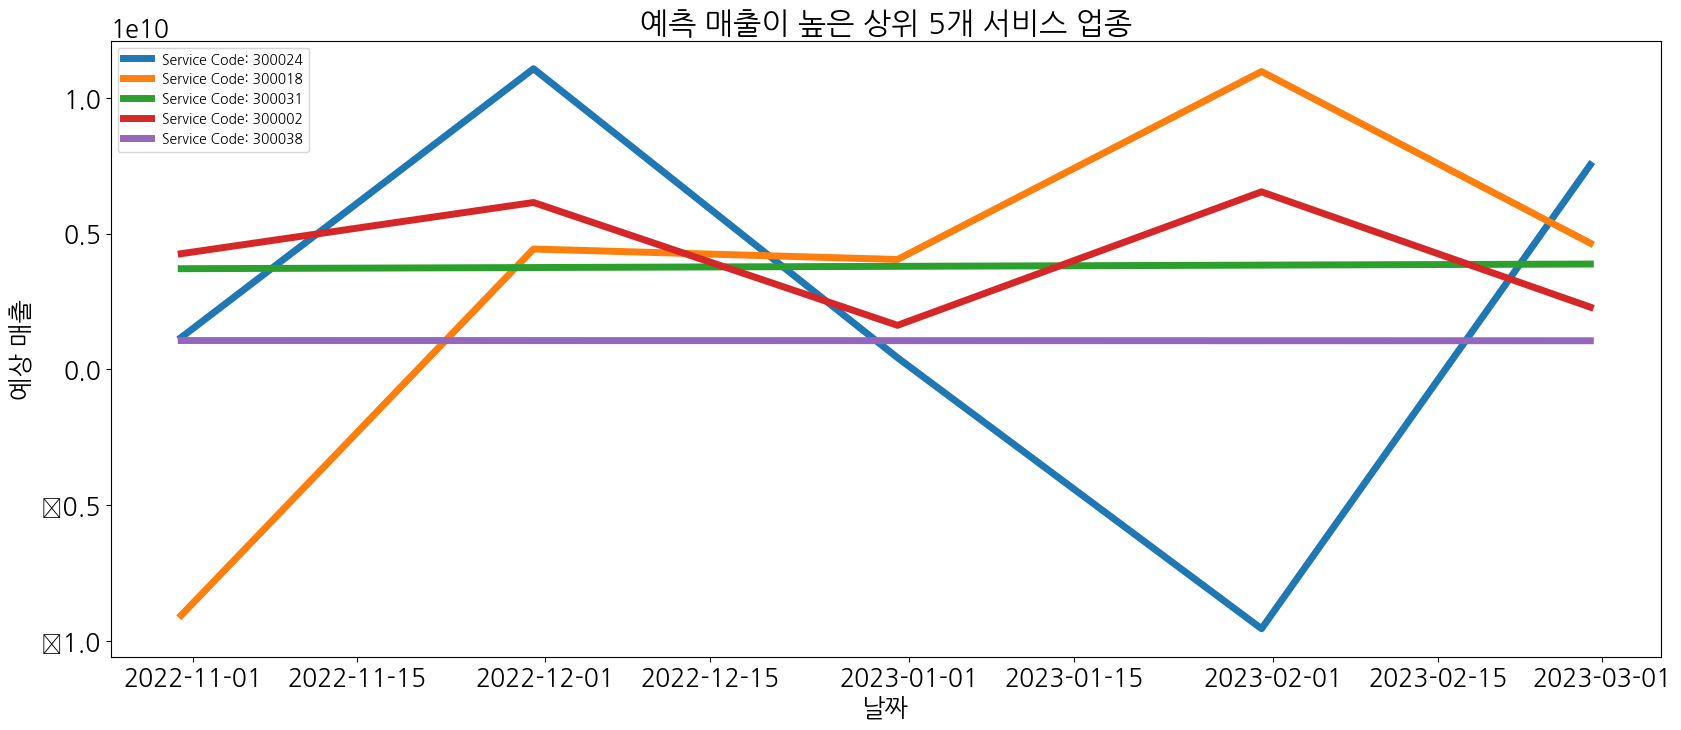

Top 5 서비스 업종: ['운동/경기용품', '의약품', '가구', '편의점', '자동차부품']


In [ ]:
make_def_4(11740700, 3)

In [ ]:
df_service =pd.read_csv('/content/drive/MyDrive/[최종프로젝트]_우리FISA/0911/업종_분류.csv',encoding='euc-kr')
df_service = df_service[['서비스_업종_코드_명','서비스_업종_코드']]
df_service['서비스_업종_코드'] = df_service['서비스_업종_코드'].str.replace('CS', '')
df_service['서비스_업종_코드'] = df_service['서비스_업종_코드'].astype(int)

Empty DataFrame
Columns: [서비스_업종_코드_명, 서비스_업종_코드]
Index: []


In [ ]:
# df_service에서 '서비스_업종_코드_명' 컬럼과 '서비스_업종_코드' 컬럼 설정
df_service = df_service[['서비스_업종_코드_명', '서비스_업종_코드']]
df_service['서비스_업종_코드'] = df_service['서비스_업종_코드'].str.replace('CS', '')
df_service['서비스_업종_코드'] = df_service['서비스_업종_코드'].astype(int)

# df_service에서 '서비스_업종_코드'와 일치하는 '서비스_업종_코드_명' 가져오기
        df_service_filtered = df_service[df_service['서비스_업종_코드'] == service_code]
        if not df_service_filtered.empty:
            service_name = df_service_filtered.iloc[0]['서비스_업종_코드_명']
            print(f'Service Code: {service_code}, Service Name: {service_name}')


# 한글 폰트 깨질 때

In [ ]:
# 코랩에서 한글 폰트 깨지는 현상 해결을 위해 한국어 폰트들을 설치합니다
!sudo apt-get install -y fonts-nanum # 매직메소드
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 이후 런타임 재시작해주세요

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (18.5 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120901 files and direc

In [ ]:
# %matplotlib inline  # 버전이 낮은 노트북에서 그래프가 바로 뜨지 않을 때 사용 % 쉘메소드

import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm # 폰트 관련 용도

In [ ]:
# 한국어 깨질 때
# 필요 라이브러리 불러오기
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt
# apt-get : 패키지 설치 명령어
# -qq : 에러외의 메세지 숨기는 옵션키
!apt-get -qq install fonts-nanum
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정

In [ ]:
# 현재 설치된 폰트 확인해보기
sys_font = fm.findSystemFonts()

print(f"sys_font number: {len(sys_font)}")
print(sys_font)

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 29
['/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf', '/usr/share/fonts/true